In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.append("..")

import WordSegmentation

(-0.5, 1199.5, 590.5, -0.5)

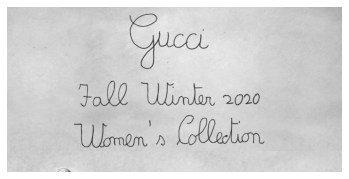

In [117]:
doc_img = cv2.cvtColor(cv2.imread("../sample_forms/gucci.jpg"), cv2.COLOR_BGR2GRAY)

plt.imshow(doc_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

(-0.5, 1199.5, 590.5, -0.5)

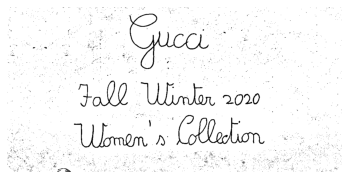

In [125]:
def preprocess_img(img):
    # https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=adaptivethreshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 10)
    return img

doc = preprocess_img(doc_img)
    
plt.imshow(doc, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [126]:
res = WordSegmentation.wordSegmentation(doc, kernelSize=11, sigma=20, theta=20, minArea=500)

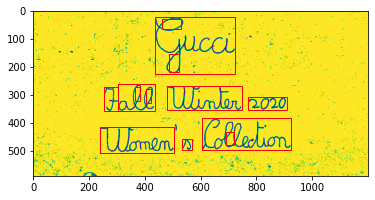

In [128]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(doc)

for w in res:
    wordBox, wordImg = w
    x, y, w, h = wordBox
    
    rect = patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
plt.show()

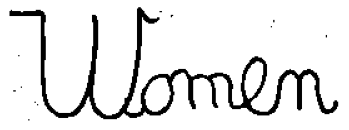

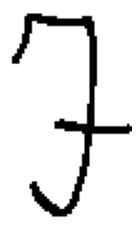

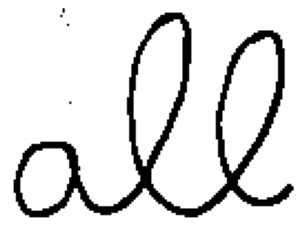

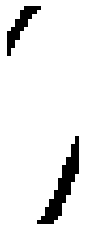

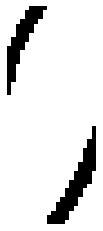

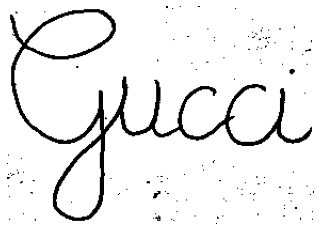

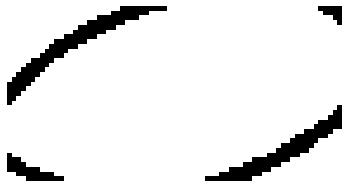

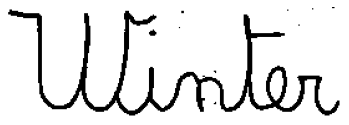

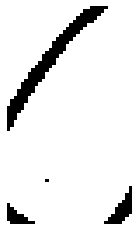

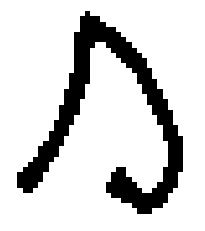

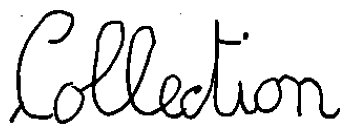

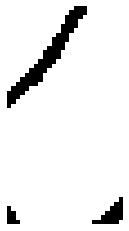

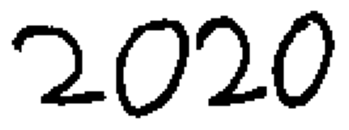

In [129]:
word_boxes = []

for w in res:
    wordBox, wordImg = w
    x, y, w, h = wordBox
    word_boxes.append(wordBox)
    
    plt.figure()
    plt.imshow(doc[y:y+h,x:x+w], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

In [130]:
def remove_subboxes(old_boxes):
    boxes = []
    for b1 in old_boxes:
        is_subbox = False
        for b2 in old_boxes:
            if (b1[0]>=b2[0]) and (b1[1]>=b2[1]) and (b1[0]+b1[2]<=b2[0]+b2[2]) and (b1[1]+b1[3]<=b2[1]+b2[3]) and (b1!=b2).all():
                is_subbox=True
            
        if not is_subbox:
            boxes.append(b1)
    return np.array(boxes)
            
word_boxes = remove_subboxes(np.array(word_boxes))

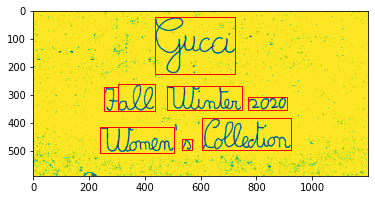

In [131]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(doc)

for w in word_boxes:
    x, y, w, h = w
    
    rect = patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
plt.show()

In [132]:
avg_height = np.mean(word_boxes[:,3])
avg_height

96.875

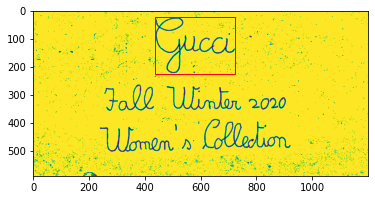

[[436  21 288 204]] [[238 414 268  93]
 [254 273  50  87]
 [304 261 131  98]
 [478 267 269  89]
 [532 457  37  42]
 [605 384 319 114]
 [771 307 138  48]]


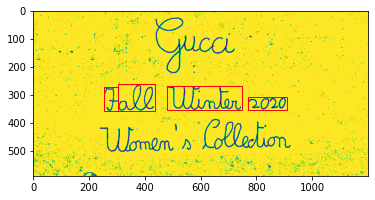

[[254 273  50  87]
 [304 261 131  98]
 [478 267 269  89]
 [771 307 138  48]] [[238 414 268  93]
 [532 457  37  42]
 [605 384 319 114]]


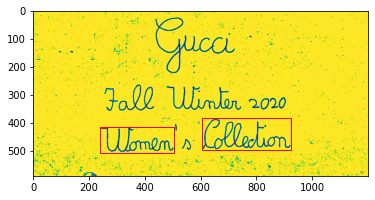

[[238 414 268  93]
 [605 384 319 114]] [[532 457  37  42]]


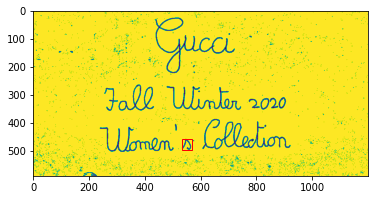

[[532 457  37  42]] []


In [137]:
# get words in top line ot text
def next_line(words, avg_height, height_ratio=0.75):
    topy = np.min(words[:,1])
    threshold = topy + (avg_height*height_ratio)
    
    line = []
    remainder = []
    for word in words:
        if word[1] <= threshold:
            line.append(word)
        else:
            remainder.append(word)
            
    return np.array(line), np.array(remainder)

sorted_words = []
temp_boxes = word_boxes[:]
while temp_boxes.shape[0]:
    line, temp_boxes = next_line(temp_boxes, avg_height)
    sorted_line = sorted(list(line), key=lambda x:x[0])
    sorted_words = sorted_words+sorted_line
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(doc)
    for w in line:
        x, y, w, h = w
        rect = patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    plt.show()
    
    print(line, temp_boxes)
    input()
    

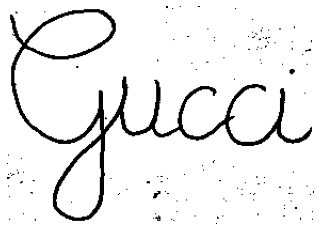

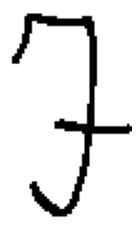

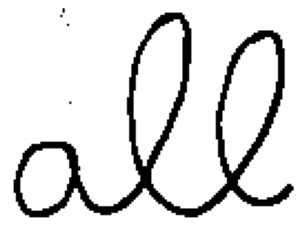

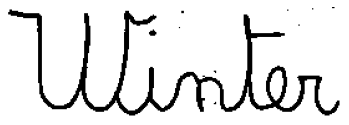

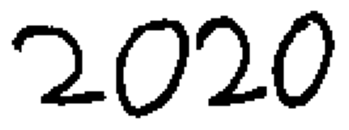

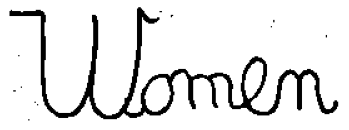

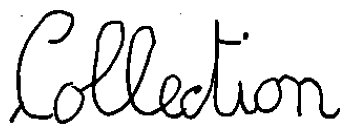

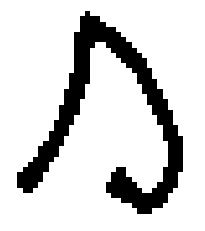

In [139]:
for w in sorted_words:
    x, y, w, h = w
    
    plt.figure()
    plt.imshow(doc[y:y+h,x:x+w], cmap='gray', vmin=0, vmax=255)
    plt.axis('off')